Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 1, 32)         320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 1, 32)         0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 9, 1, 32)         128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 1, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 1, 32)         0         
 2D)                                                             
                                                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Unrecognized location 'upper right '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


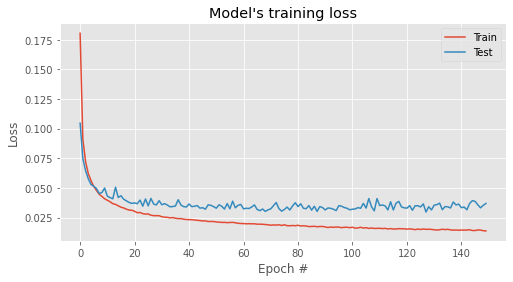

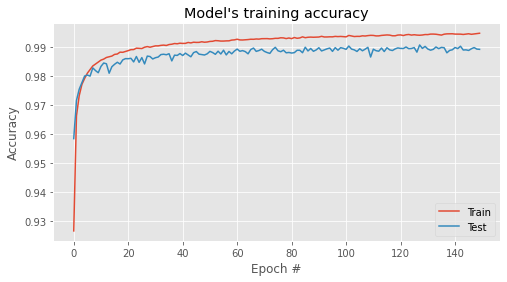

4582/4582 - 9s - loss: 0.0409 - accuracy: 0.9888 - 9s/epoch - 2ms/step

Test accuracy: 0.9887927770614624
Target: 1, Predicted label: [0]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "/content/drive/MyDrive/CNN Full database.csv"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    data = pd.read_csv(DATA_PATH)

    X=np.array(data.iloc[:,:-1]).astype('float32')

    y=np.array(data.iloc[:,-1])
    return X, y


def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper right ')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32,(3, 3),activation='relu',kernel_initializer='he_uniform',input_shape=input_shape,padding='same'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(3, 3), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(3, 3), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(3, 3), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(125, activation='relu',kernel_initializer='he_uniform'))
    #model.add(keras.layers.Dropout(0.45))

    # output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))
    #tf.math.confusion_matrix(y, predicted_index)


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.30, 0.10)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    #optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=256, epochs=150)

    # save modal
    model.save("my_model2")
    # Serialize model to JSON:
    model_json = model.to_json()
    with open("drone1.json", "w") as json_file:
      json_file.write(model_json)

    # Serialize weights to HDF5 (h5py needed):
    model.save_weights("drone1_model.h5")
    print("Model saved to disk.")

    # plot accuracy/error for training and validation
    plot_loss(history)
    plot_accuracy(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict =X_test[100]

    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
y_pred=model.predict(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
print(con_mat)

tf.Tensor(
[[38663    12]
 [19475 88452]], shape=(2, 2), dtype=int32)


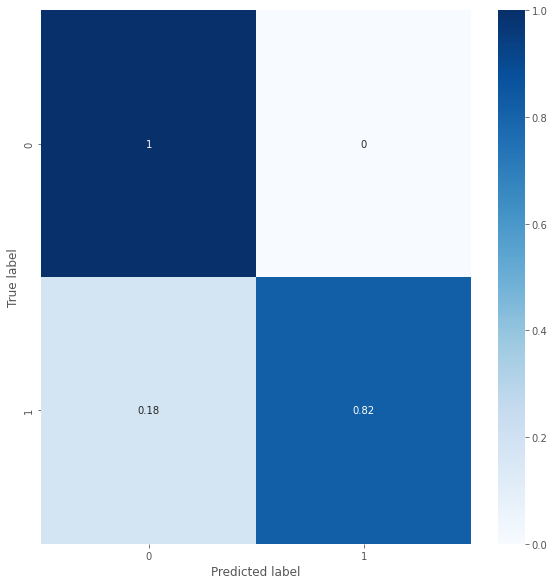

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     38675
           1       1.00      0.82      0.90    107927

    accuracy                           0.87    146602
   macro avg       0.83      0.91      0.85    146602
weighted avg       0.91      0.87      0.87    146602



In [ ]:
y_pred=model.predict(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.astype(int)))

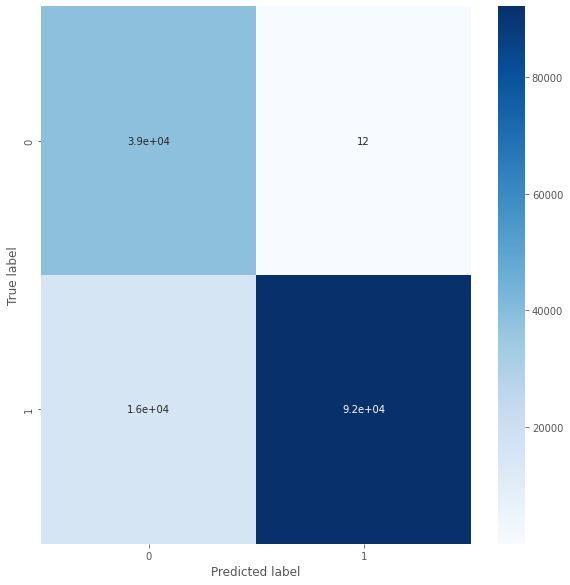

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     38614
           1       1.00      0.85      0.92    107988

    accuracy                           0.89    146602
   macro avg       0.85      0.93      0.87    146602
weighted avg       0.92      0.89      0.90    146602



In [ ]:
y_pred=model.predict(X_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred.astype(int)))

Load the model

In [ ]:
# Load json and create model:
from tensorflow.keras.models import model_from_json

json_file = open('/content/drive/MyDrive/drone1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into loaded model:
loaded_model.load_weights("/content/drive/MyDrive/drone1_model.h5")
print("Model loaded from disk.")

Model loaded from disk.


In [ ]:
# Evaluate loaded model on test data:
loaded_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

score = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {score[1]}')

4582/4582 [==============================] - 13s 3ms/step - loss: 0.0213 - accuracy: 0.9937
Test accuracy: 0.9937313199043274


In [ ]:
import pandas as pd
import numpy as np
DATA_PATH = "/content/drive/MyDrive/Drone Test File.csv"

data = pd.read_csv(DATA_PATH)

Xnew=np.array(data.iloc[:,:-1]).astype('float32')
Xnew = Xnew[..., np.newaxis]

ynew=np.array(data.iloc[:,-1])

In [ ]:
# For model prediction, this is the accurate way
#ynew_predicted = model.predict(Xnew)
#y_predicted_1=[]
#import math
#for k in range(0,len(ynew_predicted)):
#  a=float(ynew_predicted[k])
#  a=math.floor(a * 10 ** 2) / 10 ** 2
#  y_predicted_1.append(a)
#y_predicted_1=np.array(y_predicted_1)

In [ ]:
ynew_predicted = model.predict(Xnew)

In [ ]:
con_mat = tf.math.confusion_matrix(labels=ynew, predictions=ynew_predicted)
print(con_mat)

tf.Tensor(
[[496   4]
 [214 288]], shape=(2, 2), dtype=int32)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ynew, ynew_predicted.astype(int)))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       500
           1       0.99      0.57      0.73       502

    accuracy                           0.78      1002
   macro avg       0.84      0.78      0.77      1002
weighted avg       0.84      0.78      0.77      1002

